In [1]:
import sklearn.cluster as clt
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import seaborn as sb
import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
spectral_cluster = clt.SpectralClustering(n_clusters = 2,assign_labels='discretize')
affinityprop_cluster = clt.AffinityPropagation()
agllomerative_cluster = clt.AgglomerativeClustering(n_clusters=2)
OPTICS_clutser = clt.OPTICS()

In [4]:
DB = pd.read_csv("../data/processed/predictionDB.csv",lineterminator='\n')

embeddings = []
for np_name in glob.glob('./../data/processed/embeddings/*.np[yz]'):
    embeddings.append(np.load(np_name))

embeddings

[array([-3.32003310e-02, -3.33870314e-02, -6.04166687e-02,  5.50033525e-03,
        -2.99432967e-02, -3.06253787e-02, -3.62592712e-02, -5.19054709e-03,
         6.11324329e-03, -2.13654023e-02,  5.85580952e-02,  8.08253046e-03,
        -8.19081143e-02,  5.23513295e-02, -3.18930261e-02, -6.62062615e-02,
        -7.41169974e-02,  1.40739726e-02, -4.48440798e-02, -5.31232776e-03,
        -3.10434401e-02,  3.35622169e-02,  2.37572528e-02,  1.21547552e-02,
         1.24320006e-02, -2.76272334e-02,  3.60755995e-03,  2.52193902e-02,
         2.53468808e-02, -4.50785868e-02,  1.44603699e-01, -2.30402984e-02,
        -4.33548726e-02, -2.25036498e-02, -5.43170869e-02,  5.87805063e-02,
         6.53523505e-02, -6.24963827e-03, -4.52306271e-02,  3.18839066e-02,
         1.70882083e-02,  2.73972303e-02, -3.20979469e-02, -5.29405773e-02,
        -2.33301073e-02, -6.25509918e-02, -4.09288667e-02, -9.92966816e-02,
         7.01512257e-03, -2.76437774e-02,  6.16230629e-03, -4.91129532e-02,
         2.5

In [5]:
print(DB.groupby('AUTHOR').size())
Y = np.array(DB['AUTHOR'])

AUTHOR
Adrian Crum          8
Adrian Nistor        1
Alan Gates          77
Alex Karasulu       47
Alexander Shraer    11
                    ..
billh               58
dlaha                2
ecki                 4
markt                1
pjack               39
Length: 357, dtype: int64


In [6]:
X = pd.DataFrame(embeddings)
X

0         1         2         3         4         5         6    \
0     -0.033200 -0.033387 -0.060417  0.005500 -0.029943 -0.030625 -0.036259   
1     -0.027894 -0.002155  0.006455  0.000976  0.067762 -0.042829 -0.067906   
2     -0.007624  0.032759  0.029377 -0.019655 -0.079661  0.045108  0.012710   
3      0.031423 -0.005952 -0.024734  0.071320  0.070175 -0.025055  0.032899   
4     -0.051164  0.006311 -0.049149 -0.036137  0.007972 -0.066327 -0.046557   
...         ...       ...       ...       ...       ...       ...       ...   
62912 -0.068232 -0.000306 -0.029776  0.055060  0.084882 -0.028052  0.026720   
62913 -0.054742  0.043284 -0.050391 -0.028782 -0.045778 -0.073387 -0.032416   
62914 -0.033079  0.021283 -0.039452 -0.011844  0.054365 -0.057059  0.004342   
62915 -0.036659  0.025856 -0.077880  0.038954 -0.017845 -0.066087 -0.022547   
62916 -0.019758  0.034010 -0.023183  0.001014  0.030960  0.010820 -0.099832   

            7         8         9    ...       374       375       376  \
0     -0.005191  0.006113 -0.021365  ...  0.023578  0.019351  0.025399   
1      0.005475  0.002501 -0.000018  ... -0.046089 -0.009213  0.002544   
2      0.026756 -0.071430  0.048015  ... -0.098303  0.051754  0.023313   
3      0.005071  0.058430 -0.035778  ...  0.037352 -0.024800  0.052894   
4     -0.022965  0.060515  0.013582  ... -0.036350  0.038038  0.029613   
...         ...       ...       ...  ...       ...       ...       ...   
62912  0.014561  0.051769  0.012416  ...  0.045691 -0.013897  0.090629   
62913 -0.075237  0.037620 -0.051290  ... -0.051870  0.048915 -0.033529   
62914 -0.029862  0.062815  0.053983  ... -0.048574  0.026360  0.085163   
62915 -0.071243  0.081646 -0.019924  ... -0.056305  0.006119  0.089228   
62916  0.043581  0.015097 -0.037168  ... -0.038146 -0.048458  0.070983   

            377       378       379       380       381       382       383  
0      0.026690  0.030056  0.054387  0.014582 -0.033062  0.123603 -0.024670  
1      0.009284 -0.029453  0.012713  0.034143 -0.037092 -0.004953  0.058861  
2     -0.023773  0.062683  0.064655  0.036002 -0.029165 -0.059675  0.006338  
3     -0.024103  0.031561  0.119642  0.010806 -0.004610 -0.020494 -0.028321  
4      0.064588  0.066345 -0.015004  0.096551  0.072277  0.068810 -0.042754  
...         ...       ...       ...       ...       ...       ...       ...  
62912 -0.021644 -0.007951  0.083509  0.040166 -0.029178  0.011796 -0.015595  
62913 -0.032307  0.000768  0.039802  0.046081 -0.032529  0.097599 -0.045777  
62914  0.107214  0.099046  0.046659  0.031722 -0.023701  0.032184 -0.058339  
62915 -0.020453  0.007119  0.040170 -0.009010 -0.016650  0.019555 -0.026460  
62916  0.061684  0.024490  0.000926  0.049390 -0.007682  0.004592 -0.042804  

[62917 rows x 384 columns]

## **PCA**

<ipython-input-7-f91891880543>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


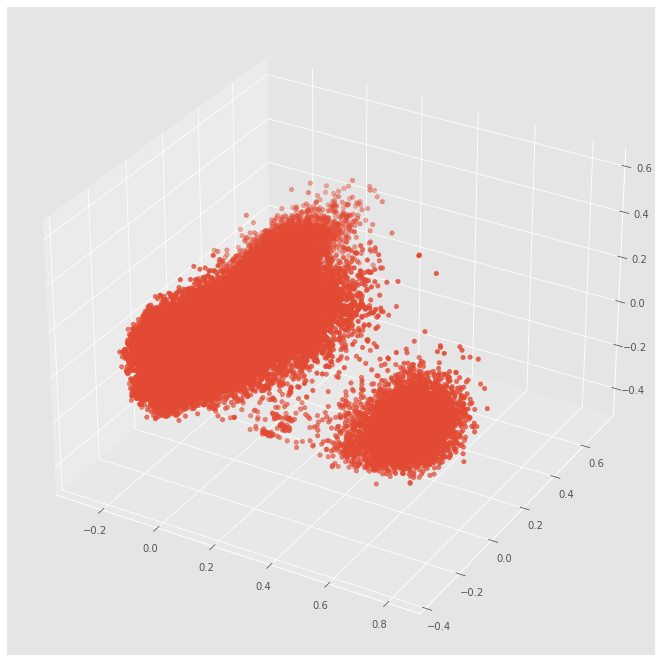

In [7]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
princomp = np.array(principalDf)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(princomp[:,0], princomp[:,1], princomp[:,2])

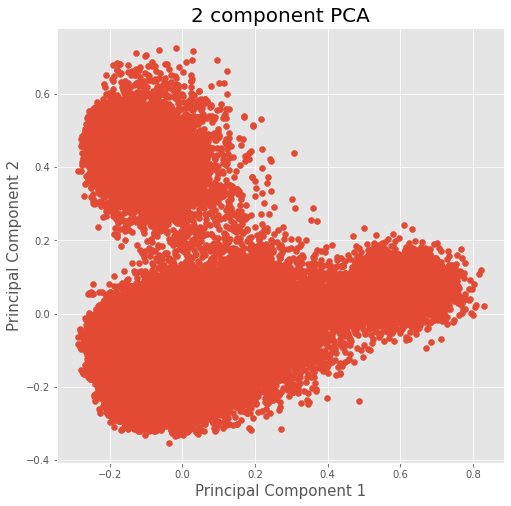

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(princomp[: ,0], princomp[: ,1])

## **K-MEANS**

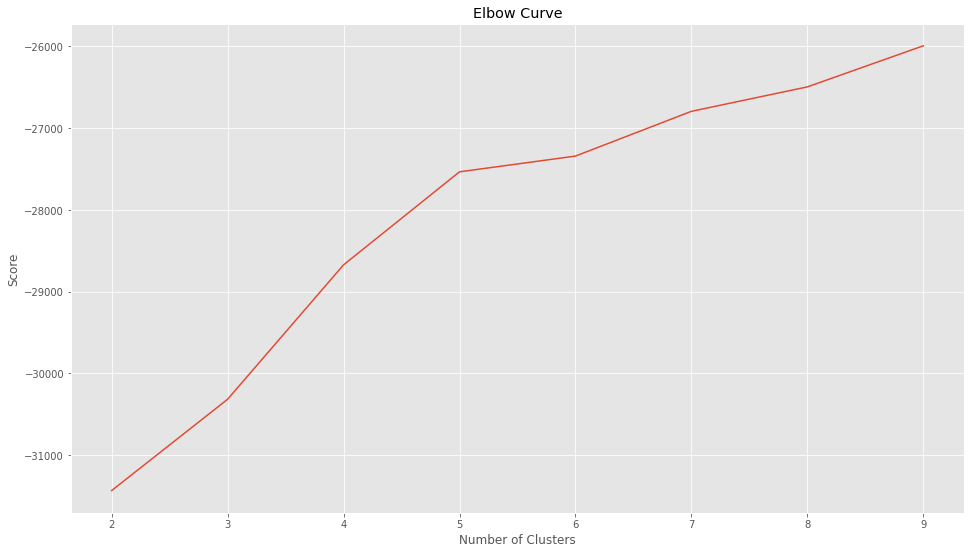

In [9]:
#Define the optimal k class
Nc = range(2, 10)
kmeans = [clt.MiniBatchKMeans(n_clusters=i, batch_size=1024) for i in Nc]
score = [kmeans[i].fit(embeddings).score(embeddings) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**K-MEANS WITH K = 3**

<ipython-input-19-8b345e4bb5df>:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


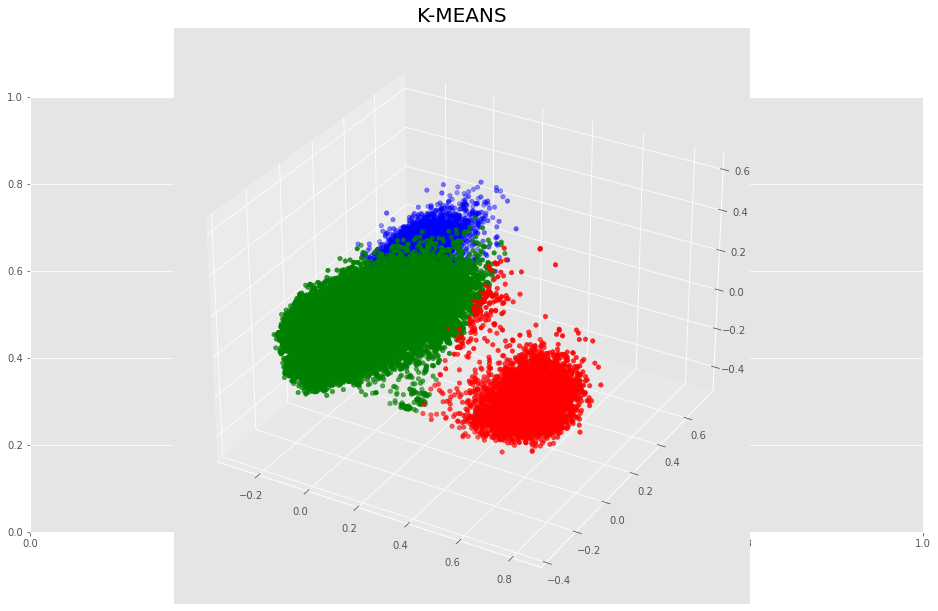

In [19]:
kmeans = clt.MiniBatchKMeans(n_clusters=3).fit(embeddings)
labels = kmeans.predict(embeddings)

# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue']
asign=[]

for row in labels:
    asign.append(colors[row])

#plotting 3D clusters
fig, ax = plt.subplots(figsize = (16,8))
ax = Axes3D(fig)
ax.scatter(princomp[:, 0], princomp[:, 1], princomp[:,2], c=asign)
ax.set_title('K-MEANS', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'K-MEANS')

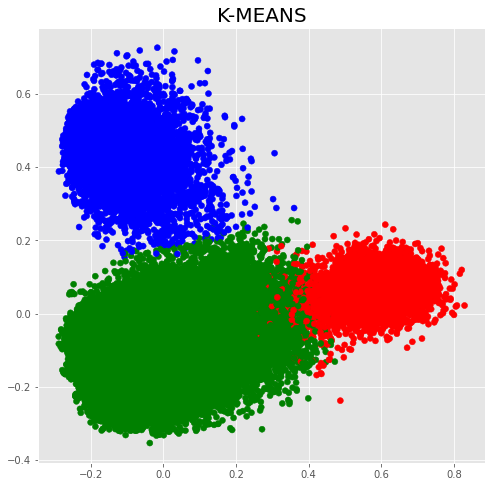

In [22]:
#plotting 2D clusters
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize = (8,8))
ax.scatter(princomp[:, 0], princomp[:, 1], c=asign)
ax.set_title('K-MEANS', fontsize = 20)

In [12]:
#Commit classification per author
k3_mean = pd.DataFrame()
k3_mean["AUTHOR"] = DB["AUTHOR"]
clusters= pd.DataFrame({"Cluster": labels})
clusters = clusters["Cluster"].map(str).str.get_dummies()
k3_mean = pd.concat([k3_mean, clusters], axis = 1)
k3_mean = k3_mean.groupby(["AUTHOR"], as_index = False).agg("sum")
k3_mean

AUTHOR   0   1   2
0         Adrian Crum   1   6   1
1       Adrian Nistor   0   1   0
2          Alan Gates  12  56   9
3       Alex Karasulu   2  38   7
4    Alexander Shraer   1   9   1
..                ...  ..  ..  ..
352             billh   7  36  15
353             dlaha   1   0   1
354              ecki   1   3   0
355             markt   0   1   0
356             pjack   5  31   3

[357 rows x 4 columns]

In [13]:
#Classificate authors in its maximum cluster
k3 = k3_mean.to_numpy()
author_cluster_k3 = []
author_cluster_k3 = pd.DataFrame()
author_cluster_k3["AUTHOR"] = k3[:, 0]
final_cluster = [np.argmax(k3[i,1:k3.shape[1]]) for i in range(k3.shape[0])]
author_cluster_k3["Final Cluster"] = final_cluster
author_cluster_k3
pd.pivot_table(author_cluster_k3, columns = "Final Cluster", aggfunc = "count")

Final Cluster   0    1  2
AUTHOR         10  341  6

**K-MEANS k=4**

<ipython-input-14-8576b0df669a>:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


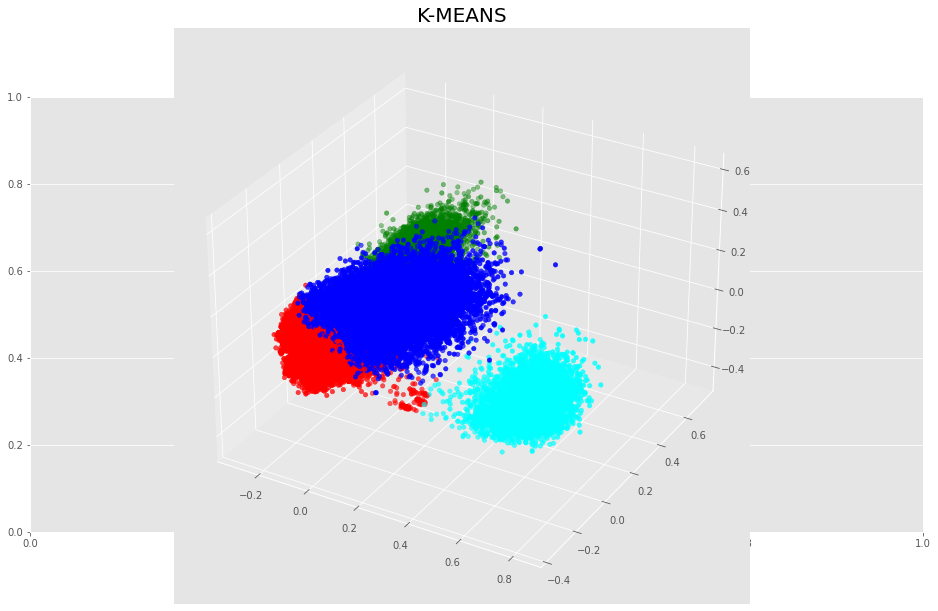

In [14]:
kmeans = clt.MiniBatchKMeans(n_clusters=4).fit(embeddings)
labels = kmeans.predict(embeddings)

# Getting the cluster centers
C = kmeans.cluster_centers_
colors=['red','green','blue', 'cyan']
asign=[]

for row in labels:
    asign.append(colors[row])

#Plotting 3D clusters
fig, ax = plt.subplots(figsize = (16,8))
ax = Axes3D(fig)
ax.scatter(princomp[:, 0], princomp[:, 1], princomp[:,2], c=asign)
ax.set_title('K-MEANS', fontsize = 20)
plt.show()

Text(0.5, 1.0, 'K-MEANS')

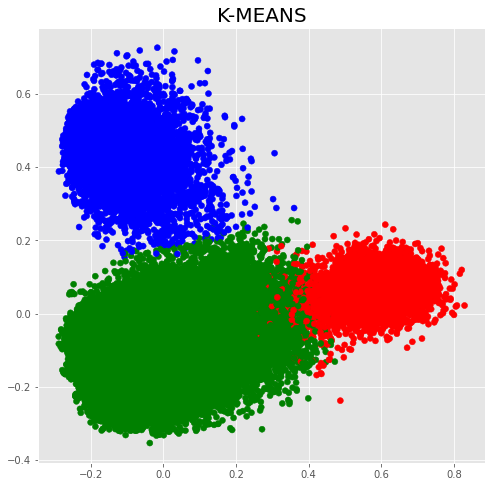

In [23]:
#Plotting 2D clusters
fig, ax = plt.subplots(1,1, sharex=True, sharey=True, figsize = (8,8))
ax.scatter(princomp[:, 0], princomp[:, 1], c=asign)
ax.set_title('K-MEANS', fontsize = 20)

In [24]:
#Commit classification per author
k4_mean = pd.DataFrame()
k4_mean["AUTHOR"] = DB["AUTHOR"]
clusters= pd.DataFrame({"Cluster": labels})
clusters = clusters["Cluster"].map(str).str.get_dummies()
k4_mean = pd.concat([k4_mean, clusters], axis = 1)
k4_mean = k4_mean.groupby(["AUTHOR"]).agg("sum")
k4_mean

0   1   2
AUTHOR                      
Adrian Crum        1   6   1
Adrian Nistor      0   1   0
Alan Gates        12  56   9
Alex Karasulu      2  38   7
Alexander Shraer   1   9   1
...               ..  ..  ..
billh              7  36  15
dlaha              1   0   1
ecki               1   3   0
markt              0   1   0
pjack              6  30   3

[357 rows x 3 columns]

In [25]:
#Classificate authors in its maximum cluster
k4 = k4_mean.to_numpy()
author_cluster_k4 = []
    
author_cluster_k4 = pd.DataFrame()
author_cluster_k4["AUTHOR"] = k4[:, 0]
final_cluster = [np.argmax(k4[i,1:k4.shape[1]]) for i in range(k4.shape[0])]
author_cluster_k4["Final Cluster"] = final_cluster
print(author_cluster_k4)
pd.pivot_table(author_cluster_k4, columns = "Final Cluster", aggfunc = "count")

     AUTHOR  Final Cluster
0         1              0
1         0              0
2        12              0
3         2              0
4         1              0
..      ...            ...
352       7              0
353       1              1
354       1              0
355       0              0
356       6              0

[357 rows x 2 columns]


Final Cluster    0  1
AUTHOR         349  8

# **OPTICS**

In [36]:
optics = clt.OPTICS(cluster_method = "xi").fit(embeddings)

KeyboardInterrupt: 

In [ ]:
labels = optics.labels_